# Compare Stanford and Operator QC Criteria
Code author: Sahar H. El Abbadi
Date started: 2022-03-02
Date last edited: 2022-03-02

In [1]:
import numpy as np
import pandas as pd
import pathlib

# Setup

# Imports
from methods_data_cleaning import load_clean_data, load_meter_data
from methods_analysis import evaluate_qc

# Load clean operator data
cm_1, cm_2, cm_3, ghg_1, ghg_2, kairos_1_ls23, kairos_1_ls25, kairos_2_ls23, kairos_2_ls25, kairos_3_ls23, kairos_3_ls25 = load_clean_data()

# Load meter data
cm_meter, ghg_meter, kairos_meter = load_meter_data()

In [2]:
# Carbon Mapper QC

operator = "Carbon Mapper"
operator_meter = cm_meter

# Stage 1
stage = 1
operator_report = cm_1
cm_1_qc = evaluate_qc(operator, stage, operator_report, operator_meter)

# Stage 2
stage = 2
operator_report = cm_2
cm_2_qc = evaluate_qc(operator, stage, operator_report, operator_meter)

# Stage 3
stage = 3
operator_report = cm_3
cm_3_qc = evaluate_qc(operator, stage, operator_report, operator_meter)



In [3]:
# GHGSat

operator = "GHGSat"
operator_meter = ghg_meter

# Stage 1
stage = 1
operator_report = ghg_1
ghg_1_qc = evaluate_qc(operator, stage, operator_report, operator_meter)

# Stage 2
stage = 2
operator_report = ghg_2
ghg_2_qc = evaluate_qc(operator, stage, operator_report, operator_meter)

# Stage 3
stage = 3
operator_report = ghg_2
ghg_3_qc = evaluate_qc(operator, stage, operator_report, operator_meter)


In [4]:
# Kairos

operator = "Kairos LS23"
operator_meter = kairos_meter

# Stage 1
stage = 1
operator_report = kairos_1_ls23
kairos_1_ls23_qc = evaluate_qc(operator, stage, operator_report, operator_meter)

# Stage 2
stage = 2
operator_report = kairos_2_ls23
kairos_2_ls23_qc = evaluate_qc(operator, stage, operator_report, operator_meter)

# Stage 3
stage = 3
operator_report = kairos_3_ls23
kairos_3_ls23_qc = evaluate_qc(operator, stage, operator_report, operator_meter)

In [5]:
# Kairos

operator = "Kairos LS25"
operator_meter = kairos_meter

# Stage 1
stage = 1
operator_report = kairos_1_ls25
kairos_1_ls25_qc = evaluate_qc(operator, stage, operator_report, operator_meter)

# Stage 2
stage = 2
operator_report = kairos_2_ls25
kairos_2_ls25_qc = evaluate_qc(operator, stage, operator_report, operator_meter)

# Stage 3
stage = 3
operator_report = kairos_3_ls25
kairos_3_ls25_qc = evaluate_qc(operator, stage, operator_report, operator_meter)

In [6]:
# Combine all individual QC dataframes

all_qc = [cm_1_qc, cm_2_qc, cm_3_qc, ghg_1_qc, ghg_2_qc, ghg_3_qc, kairos_1_ls23_qc, kairos_2_ls23_qc, kairos_3_ls23_qc, kairos_1_ls25_qc, kairos_2_ls25_qc, kairos_3_ls25_qc]

all_qc = pd.concat(all_qc)
all_qc.to_csv(pathlib.PurePath('03_results', 'qc_comparison', 'all_qc.csv'))

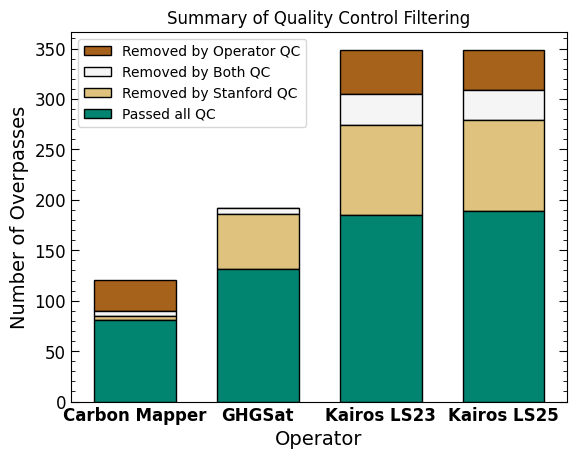

In [7]:
from plot_methods import abbreviate_op_name
import matplotlib.pyplot as plt
import datetime

all_qc = [cm_1_qc, cm_2_qc, cm_3_qc, ghg_1_qc, ghg_2_qc, ghg_3_qc, kairos_1_ls23_qc, kairos_2_ls23_qc, kairos_3_ls23_qc, kairos_1_ls25_qc, kairos_2_ls25_qc, kairos_3_ls25_qc]

all_qc = pd.concat(all_qc)
all_qc.to_csv(pathlib.PurePath('03_results', 'qc_comparison', 'all_qc.csv'))

# Plot

category = ['fail_stanford_only', 'fail_all_qc', 'fail_operator_only']
stage = 1
n_operators = 4 # number of operators
operators = ['Carbon Mapper', 'GHGSat', 'Kairos LS23', 'Kairos LS25']
# Determine values for each group, alphabetical order of operators: "Carbon Mapper, GHGSat, Kairos"

fail_operator = np.zeros(n_operators)
fail_stanford = np.zeros(n_operators)
fail_all = np.zeros(n_operators)
pass_all = np.zeros(n_operators)

# Height of bars

for i in range(len(operators)): # for go through fail stanford only
    op_ab = abbreviate_op_name(operators[i])
    operator_qc = all_qc.loc[all_qc.operator == op_ab]
    operator_stage_qc = operator_qc.loc[operator_qc.stage == stage]
    fail_operator[i] = operator_stage_qc.fail_operator_only
    fail_stanford[i] = operator_stage_qc.fail_stanford_only
    fail_all[i] = operator_stage_qc.fail_all_qc
    pass_all[i] = operator_stage_qc.pass_all_qc

barWidth = 1
# Set height of all sets of bars
# Height of stanford_fail is height of pass_all
# Height of fail_all is height of fail_stanford and pass_all
all_fail_height = np.add(fail_stanford, pass_all).tolist()
# height of fail_operator + fail_all
operator_height = np.add(all_fail_height, fail_all).tolist()

# Set color scheme
pass_color = '#018571'
fail_op_color = '#a6611a'
fail_stanford_color = '#dfc27d'
fail_both_color = '#f5f5f5'

# pass_color = '#87C27E'
# fail_op_color = '#FCEFA9'
# fail_stanford_color = '#B9B5D6'
# fail_both_color = '#B8ADAA'

# The position of the bars on the x-axis
r = [0,1.5,3,4.5]

# Bars for fail operator QC (on top of failing Stanford and both)
plt.bar(r, fail_operator, bottom=operator_height, color=fail_op_color, edgecolor='black', width=barWidth, label = 'Removed by Operator QC')
# Create bars for failing both QC criteria
plt.bar(r, fail_all, bottom=all_fail_height, color=fail_both_color, edgecolor='black', width=barWidth,  label = "Removed by Both QC")
# Create failing Stanford QC only
plt.bar(r, fail_stanford, bottom=pass_all, color=fail_stanford_color, edgecolor='black', width=barWidth, label = "Removed by Stanford QC")
# Creat bars for passing all QC
plt.bar(r, pass_all, color=pass_color, edgecolor='black', width=barWidth, label = 'Passed all QC')

# Custom X axis
plt.xticks(r, operators, fontweight='bold')
plt.xlabel("Operator", fontsize = 14)
plt.ylabel("Number of Overpasses", fontsize = 14)
plt.title("Summary of Quality Control Filtering")
plt.tick_params(direction='in', right=True, top=True)
plt.tick_params(labelsize=12)
plt.minorticks_on()
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in', which='minor', length=3, bottom=False, top=False, left=True, right=True)
plt.tick_params(direction='in', which='major', length=6, bottom=False, top=False, left=True, right=True)

plt.legend()

# Save figure
now = datetime.datetime.now()
op_ab = abbreviate_op_name(operator)
save_time = now.strftime("%Y%m%d")
fig_name = f'qc_stage{stage}_{save_time}'
fig_path = pathlib.PurePath('04_figures', fig_name)
plt.savefig(fig_path)
plt.show()
